In [0]:
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import time

from torchvision import datasets

In [0]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))]
)

In [0]:
trainset = datasets.MNIST(
    root = './data',
    train = True,
    download = True,
    transform = transform
)

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size = 4,
    shuffle = True
)

testset = datasets.MNIST(
    root = './data',
    train = False,
    download = True,
    transform = transform
)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size = 4,
    shuffle = False
)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...



Done!


torch.Size([4, 1, 28, 28])
tensor([9, 4, 3, 8])



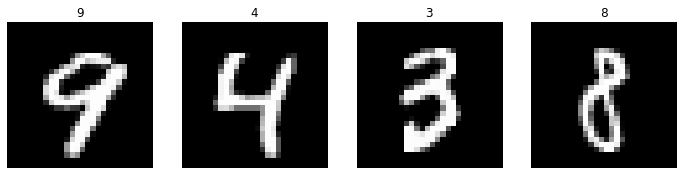

In [0]:
for batch_1 in trainloader:
  batch = batch_1
  break

print(batch[0].shape)
print(batch[1])

plt.figure(figsize = (12,8))
for i in range (batch[0].shape[0]):
  plt.subplot(1, 4, i+1)
  plt.axis("off")
  plt.imshow(batch[0][i].reshape(28,28), cmap="gray")
  plt.title(int(batch[1][i]))
  plt.savefig('digit_mnist.png')
plt.show()

In [0]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=20,
                           kernel_size=5, stride=1)
    self.conv2 = nn.Conv2d(in_channels=20, out_channels=50,
                           kernel_size=5, stride=1)
    self.fc1 = nn.Linear(in_features=800, out_features=500)
    self.fc2 = nn.Linear(in_features=500, out_features=10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x,2,2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x,2,2)
    x = x.view(x.size(0),-1)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else cpu)

In [0]:
net = Net().to(device)
print(Net)

<class '__main__.Net'>


In [0]:
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [0]:
def train(net):
    start = time.time()
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data[0].to(device, non_blocking=True), data[1].to(device, non_blocking=True)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
 
            running_loss += loss.item()
            if i % 5000 == 4999:
                print('[Epoch %d, %5d Mini Batches] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss/5000))
                running_loss = 0.0
    end = time.time()
 
    print('Done Training')
    print('%0.2f minutes' %((end - start) / 60))
    
train(net)

[Epoch 1,  5000 Mini Batches] loss: 0.313
[Epoch 1, 10000 Mini Batches] loss: 0.085
[Epoch 1, 15000 Mini Batches] loss: 0.060
[Epoch 2,  5000 Mini Batches] loss: 0.047
[Epoch 2, 10000 Mini Batches] loss: 0.039
[Epoch 2, 15000 Mini Batches] loss: 0.040
[Epoch 3,  5000 Mini Batches] loss: 0.030
[Epoch 3, 10000 Mini Batches] loss: 0.030
[Epoch 3, 15000 Mini Batches] loss: 0.028
[Epoch 4,  5000 Mini Batches] loss: 0.020
[Epoch 4, 10000 Mini Batches] loss: 0.020
[Epoch 4, 15000 Mini Batches] loss: 0.023
[Epoch 5,  5000 Mini Batches] loss: 0.016
[Epoch 5, 10000 Mini Batches] loss: 0.015
[Epoch 5, 15000 Mini Batches] loss: 0.018
[Epoch 6,  5000 Mini Batches] loss: 0.010
[Epoch 6, 10000 Mini Batches] loss: 0.011
[Epoch 6, 15000 Mini Batches] loss: 0.012
[Epoch 7,  5000 Mini Batches] loss: 0.007
[Epoch 7, 10000 Mini Batches] loss: 0.011
[Epoch 7, 15000 Mini Batches] loss: 0.012
[Epoch 8,  5000 Mini Batches] loss: 0.006
[Epoch 8, 10000 Mini Batches] loss: 0.006
[Epoch 8, 15000 Mini Batches] loss

In [0]:
correct = 0
total = 0
with torch.no_grad():
  for data in testloader:
    inputs, labels = data[0].to(device, non_blocking=True), data[1].to(device, non_blocking=True)
    outputs = net(inputs)
    _, predicted = torch.max(outputs.data, 1)
    total+=labels.size(0)
    correct+=(predicted==labels).sum().item()
print('Accuracy of the network on test images: %0.3f %%' % (100*correct/total))

Accuracy of the network on test images: 99.260 %
